# Classification and prediction of topics

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, accuracy_score, roc_curve, confusion_matrix

%matplotlib inline

In [2]:
topic_df = pd.read_csv('experiment/result_all_windows_labels.csv')
topic_df.head()

,0,label,1,2,3,4,5,6,7,8,...,28,29,30,label_w2v_no,label_w2v_scale,label_w2v_normalize,label_wmd_distance,label_wmd_normalize,label_wmd_scale,label_tfidf_normalize
0,2012_01_01,violence/terrorism,syrian,assad,say,syria,killed,damascus,people,regime,...,civilian,least,journalist,20,3,20,34,6,60,15
1,2012_01_02,misc,use,osc,copyrighted_material,dissemination,usage,reproduction,original,authorize,...,al,agency,location,36,6,25,49,2,60,46
2,2012_01_03,misc,will,year,can,people,one,country,party,make,...,change,political,just,15,15,19,10,3,60,8
3,2012_01_04,misc,quot,apos,say,the,we,it,reuters,terrorists,...,but,don,protest,38,25,10,20,23,60,6
4,2012_01_05,violence/terrorism,baghdad,iraq,sunni,killed,bomb,iraqi,attacks,wound,...,sadr,basra,near,26,5,11,18,14,60,29


{'economical': 5, 'environmental': 6, 'religious': 4, 'misc': 2, 'political': 3, 'violence/terrorism': 1}


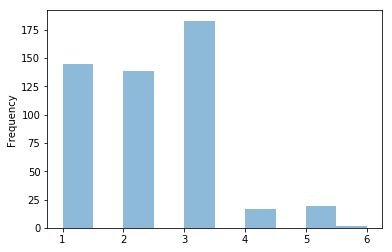

In [4]:
topic_df = topic_df[topic_df['label'].notnull()]


label_cat = {'violence/terrorism' : 1, 'misc': 2, 
             'political': 3, 'religious': 4, 
             'economical': 5, 'environmental': 6}
print(label_cat) 


def to_category(x):
    return label_cat[x]

topic_df['target'] = topic_df.apply(lambda row: to_category(row['label']), axis=1)

plt.figure()
topic_df['target'].plot.hist(alpha=0.5)
# Okay for now?


# topic_df

## Text Vector-representation (Bag of Words) 

In [5]:
topic_corpus = []

for index, row in topic_df.iloc[ :, 2:32].iterrows():
    topic_corpus.append(u' '.join(row.tolist()))

# topic_corpus

# Step 1: learn vocabulary of topics
vectorizer = CountVectorizer()
vectorizer.fit(topic_corpus)
# vectorizer.get_feature_names()

# Step 2: Vectorize the topic documents - dtm = document-token matrix
X_dtm = vectorizer.transform(topic_corpus)

# pd.DataFrame(data=X_dtm.toarray(), columns=vectorizer.get_feature_names(), index=topic_df['0'])

## Bag of Words

In [6]:
X = topic_corpus
y = topic_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [21]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
# print(y)

404 404
101 101


In [95]:
# vect = CountVectorizer(min_df=2)
vect = TfidfVectorizer(norm='l2')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Building classifier

In [101]:
%%time


from sklearn.naive_bayes import MultinomialNB

# Create instance of estimator
nb = MultinomialNB()
# Train the model
nb.fit(X_train_dtm, y_train)
# Evaluate
y_pred_test = nb.predict(X_test_dtm)
precision = precision_score(y_pred=y_pred_test, y_true=y_test, average=None)
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
recall = precision_score(y_pred=y_pred_test, y_true=y_test, average=None)
# 
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
# 
print('Precision: ', precision)
print('accuracy: ', accuracy)
print('recall: ', recall)
print(CM)

Precision:  [ 0.84615385  0.96551724  0.75555556  0.          1.        ]
accuracy:  0.841584158416
recall:  [ 0.84615385  0.96551724  0.75555556  0.          1.        ]
[[22  0  7  0  0]
 [ 0 28  0  0  0]
 [ 3  0 34  0  0]
 [ 1  1  1  0  0]
 [ 0  0  3  0  1]]
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.38 ms


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

# Create instance of estimator
logistic_regression = LogisticRegression(C=15, n_jobs=-1, random_state=15)
# Train
logistic_regression.fit(X_train_dtm, y_train)
# Evaluate
y_pred_test = logistic_regression.predict(X_test_dtm)
precision = precision_score(y_pred=y_pred_test, y_true=y_test, average=None)
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
recall = precision_score(y_pred=y_pred_test, y_true=y_test, average=None)
# 
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
# 
print('Precision: ', precision)
print('accuracy: ', accuracy)
print('recall: ', recall)
print(CM)

Precision:  [ 0.81481481  0.90322581  0.775       0.          1.        ]
accuracy:  0.831683168317
recall:  [ 0.81481481  0.90322581  0.775       0.          1.        ]
[[22  0  7  0  0]
 [ 0 28  0  0  0]
 [ 4  2 31  0  0]
 [ 1  1  1  0  0]
 [ 0  0  1  0  3]]


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


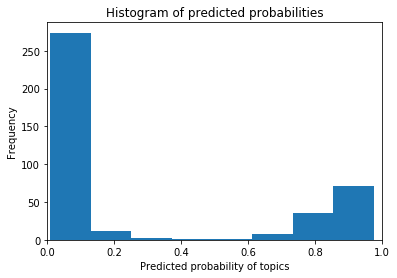

In [154]:
# store the predicted probabilities for class 1
y_pred_prob = logistic_regression.predict_proba(X_train_dtm)[:, 0]
# histogram of predicted probabilities


# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of topics')
plt.ylabel('Frequency')

## Classification Trees

In [98]:
from sklearn.tree import DecisionTreeClassifier

class_tree = DecisionTreeClassifier(max_depth=10, random_state=10)

class_tree.fit(X_train_dtm, y_train)

# Evaluate
y_pred_test = class_tree.predict(X_test_dtm)
precision = precision_score(y_pred=y_pred_test, y_true=y_test, average=None)
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
recall = precision_score(y_pred=y_pred_test, y_true=y_test, average=None)
# 
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
# 
print('Precision: ', precision)
print('accuracy: ', accuracy)
print('recall: ', recall)
print(CM)

Precision:  [ 0.82608696  0.92        0.64        0.          1.        ]
accuracy:  0.762376237624
recall:  [ 0.82608696  0.92        0.64        0.          1.        ]
[[19  0 10  0  0]
 [ 0 23  5  0  0]
 [ 3  2 32  0  0]
 [ 1  0  2  0  0]
 [ 0  0  1  0  3]]


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes Classifier - GaussianNB

In [99]:
from sklearn.naive_bayes import GaussianNB

# Create instance of estimator
gnb = GaussianNB()
# Train the model
gnb.fit(X_train_dtm.toarray(), y_train)
# Evaluate
y_pred_test = gnb.predict(X_test_dtm.toarray())
precision = precision_score(y_pred=y_pred_test, y_true=y_test, average=None)
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
recall = precision_score(y_pred=y_pred_test, y_true=y_test, average=None)
# 
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
# 
print('Precision: ', precision)
print('accuracy: ', accuracy)
print('recall: ', recall)
print(CM)

Precision:  [ 0.80769231  0.92857143  0.74418605  0.          1.        ]
accuracy:  0.811881188119
recall:  [ 0.80769231  0.92857143  0.74418605  0.          1.        ]
[[21  0  8  0  0]
 [ 0 26  1  1  0]
 [ 4  1 32  0  0]
 [ 1  1  1  0  0]
 [ 0  0  1  0  3]]


In [100]:
def predict_topic(model, doc):
    prediction = model.predict(vect.transform(doc))[0]
    print(doc)
    print(prediction)
    
predict_topic(class_tree, ['hagel iraqi baghdad iraq forces abadi troop terry coalition kuwait secretary_chuck commander us army islamic_state defense train prime_minister advise james_terry obama security is_militant military lieutenant_general'])

['hagel iraqi baghdad iraq forces abadi troop terry coalition kuwait secretary_chuck commander us army islamic_state defense train prime_minister advise james_terry obama security is_militant military lieutenant_general']
3


In [155]:
# df_X_test = pd.DataFrame(X_test)
# type(df_X_test)
# 
# # print(y_test)
# df_X_test[y_pred_test > y_test]